<a href="https://colab.research.google.com/github/Tekri96/TimeSeriesAnalysis/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PH-Sales.csv')

In [4]:
dataset.head((10))

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
5,Jun-03,189
6,Jul-03,207
7,Aug-03,207
8,Sep-03,171
9,Oct-03,150


In [5]:
len(dataset)

144

In [6]:
#monthy-year is object type. We need to convert it to date time
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
#We will use date_range for this
pd.date_range(start='2022-07-30',periods=7)

DatetimeIndex(['2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05'],
              dtype='datetime64[ns]', freq='D')

In [8]:
#MS means start of month, we need that here if we use M itll take from 2003-1-31
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))
dataset.set_index(dates,inplace=True)


In [9]:
#get month and year
dataset['month']=dates.month
dataset['year']=dates.year

In [10]:
dataset
#lets make month as jan, feb

,Month-Year,Number of Tractor Sold,month,year
2003-01-01,Jan-03,141,1,2003
2003-02-01,Feb-03,157,2,2003
2003-03-01,Mar-03,185,3,2003
2003-04-01,Apr-03,199,4,2003
2003-05-01,May-03,203,5,2003
...,...,...,...,...
2014-08-01,Aug-14,848,8,2014
2014-09-01,Sep-14,640,9,2014
2014-10-01,Oct-14,581,10,2014
2014-11-01,Nov-14,519,11,2014


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
 2   month                   144 non-null    int64 
 3   year                    144 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.6+ KB


In [12]:
import calendar
calendar.month_abbr[1]
#set dates as index
dataset.set_index(dates,inplace=True)


In [13]:
dataset['month']= dataset['month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
dataset.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)
dataset.head()

,Month-Year,Tractor-Sales,month,year
2003-01-01,Jan-03,141,Jan,2003
2003-02-01,Feb-03,157,Feb,2003
2003-03-01,Mar-03,185,Mar,2003
2003-04-01,Apr-03,199,Apr,2003
2003-05-01,May-03,203,May,2003


In [15]:
#Lets explore time series
ts_sales=dataset['Tractor-Sales']

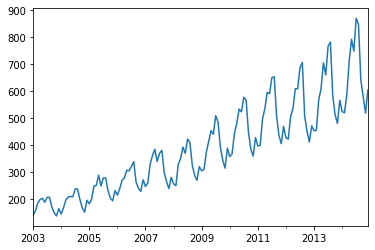

In [16]:
ts_sales.plot()
#not stationary, mean is not constant, variance is also not constant

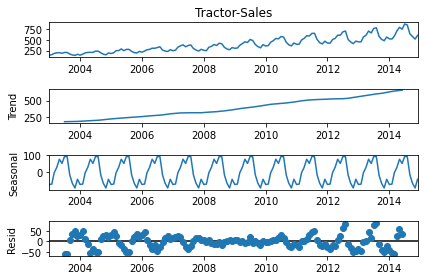

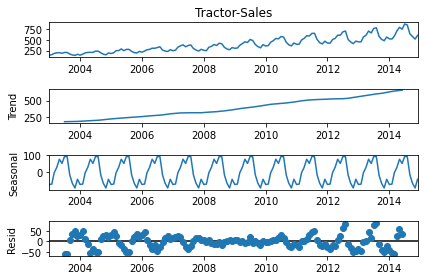

In [20]:
#lets decompose our dataset to see the stationarity factors
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_sales)
decompose.plot()

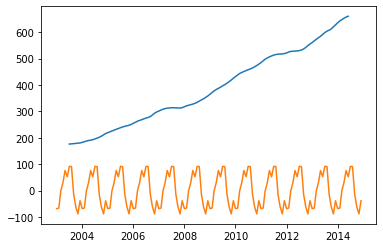

In [23]:
plt.plot(decompose.trend)
plt.plot(decompose.seasonal)

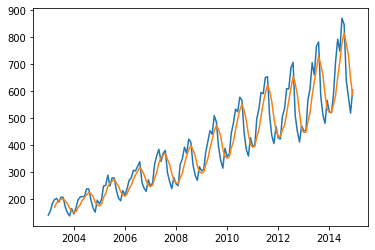

In [25]:
#lets plot rolling stats - moving average
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(4).mean())

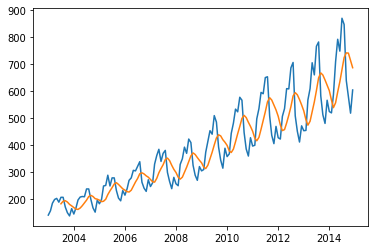

In [27]:
#lets check smoothening by altering windows
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(7).mean())


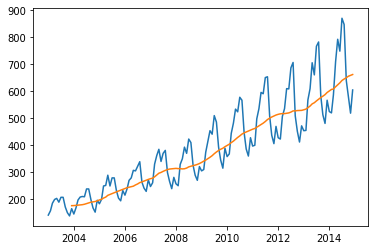

In [30]:
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(12).mean())

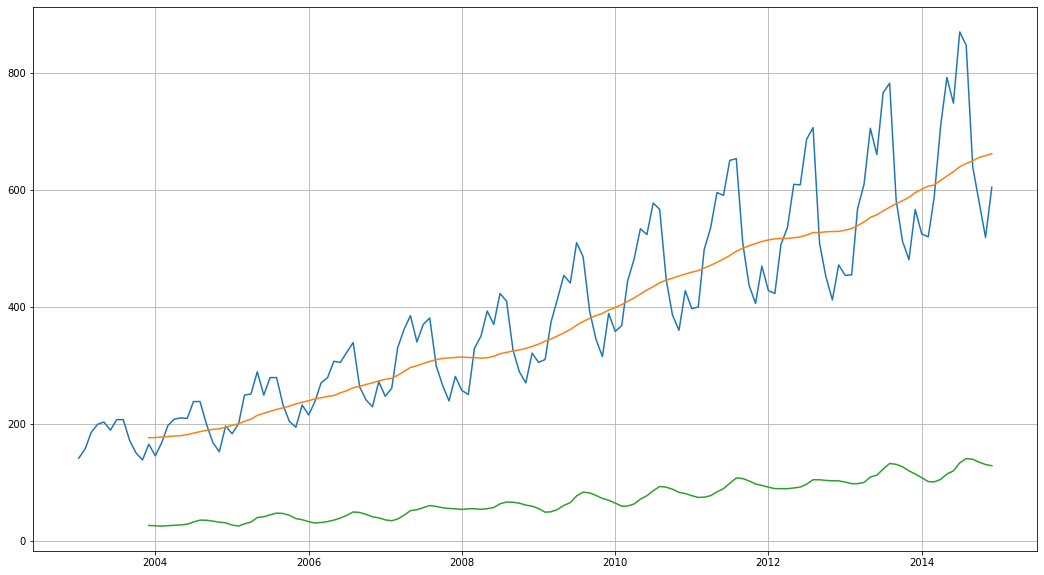

In [38]:
#Lets define a function to check stationariy using rolling statistics:
def testStationary(timeSeries):
  rollmean=ts_sales.rolling(12).mean()
  rollstd=ts_sales.rolling(12).std()

  plt.figure(figsize=(18,10))
  plt.grid('both')
  plt.plot(ts_sales)
  plt.plot(rollmean)
  plt.plot(rollstd)
testStationary(ts_sales)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


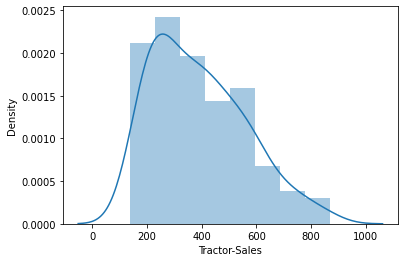

In [31]:
#little left skewed
sns.distplot(ts_sales)

In [36]:
#Converting to stationary
from statsmodels.tsa.stattools import adfuller
adfuller(ts_sales)
#not stationary p value is 0.99

(1.1088250591467341,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

(1.1088250591467341, 0.9952912415248419, 14, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 1082.5357724796872)


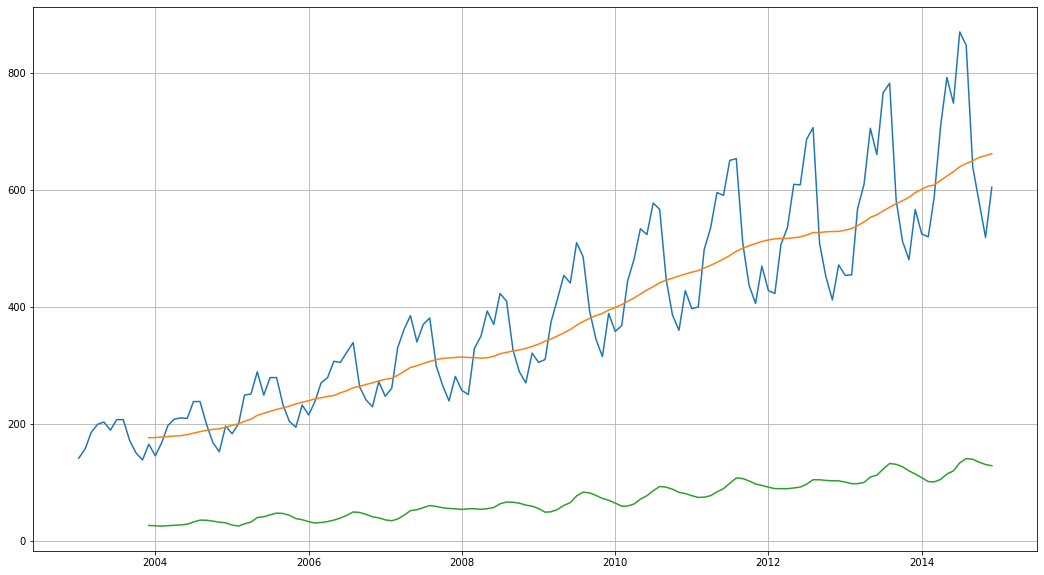

In [49]:
#Lets define a function to check stationariy using rolling statistics:
def testStationary(timeSeries):
  rollmean=ts_sales.rolling(12).mean()
  rollstd=ts_sales.rolling(12).std()

  plt.figure(figsize=(18,10))
  plt.grid('both')
  plt.plot(timeSeries)
  plt.plot(rollmean)
  plt.plot(rollstd)

  
  print(adfuller(timeSeries))
testStationary(ts_sales)

(-2.543480773196035, 0.10525012618273177, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, 1067.8217204928187)


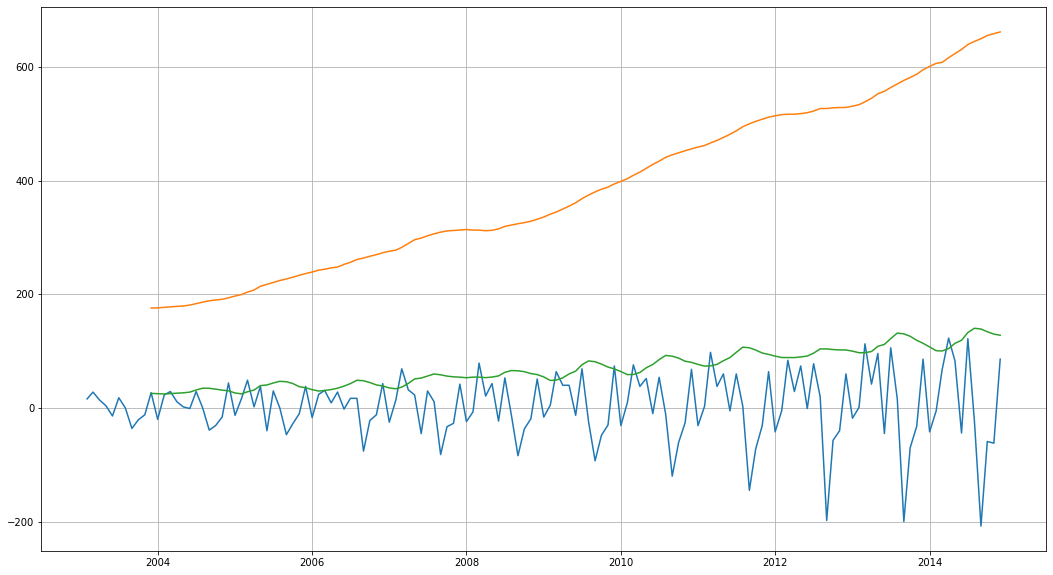

In [55]:
#Lets difference the dataset to make it stationary
#difference with one period so first value will be nan, drop those
#check with period =2,3, etc till you get stationary
one_diff_data=ts_sales.diff(periods=1)
one_diff_data.dropna(inplace=True)
testStationary(one_diff_data)


(-1.7324716814049606, 0.41446449274911, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -446.8186692532702)


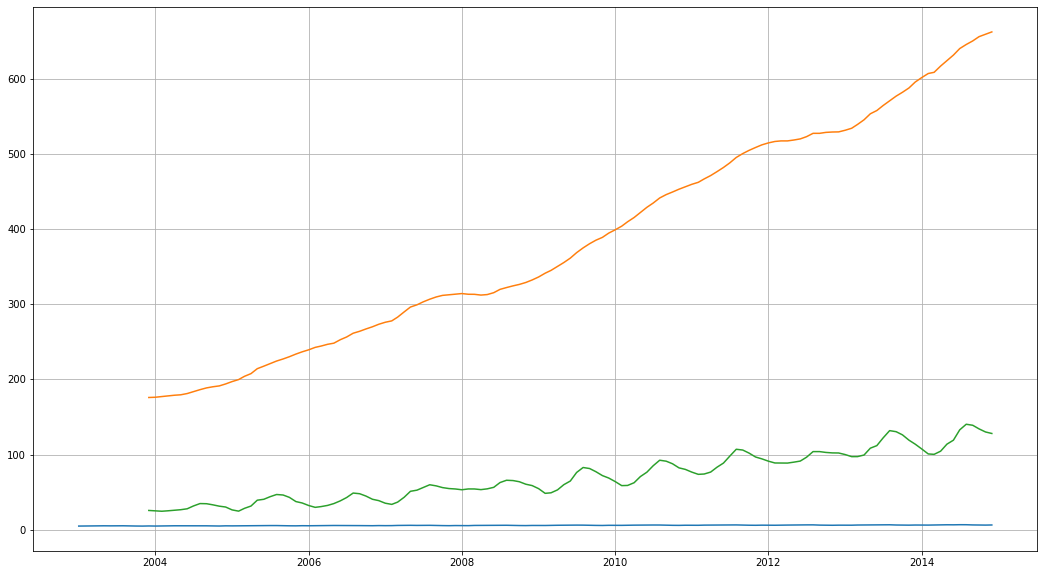

In [57]:
#Lets try some other transformations
log_diff_data = np.log(ts_sales)
log_diff_data.diff(periods=2).dropna()
testStationary(log_diff_data)

(-3.200721566232408, 0.019942950105460978, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -434.9038941451596)


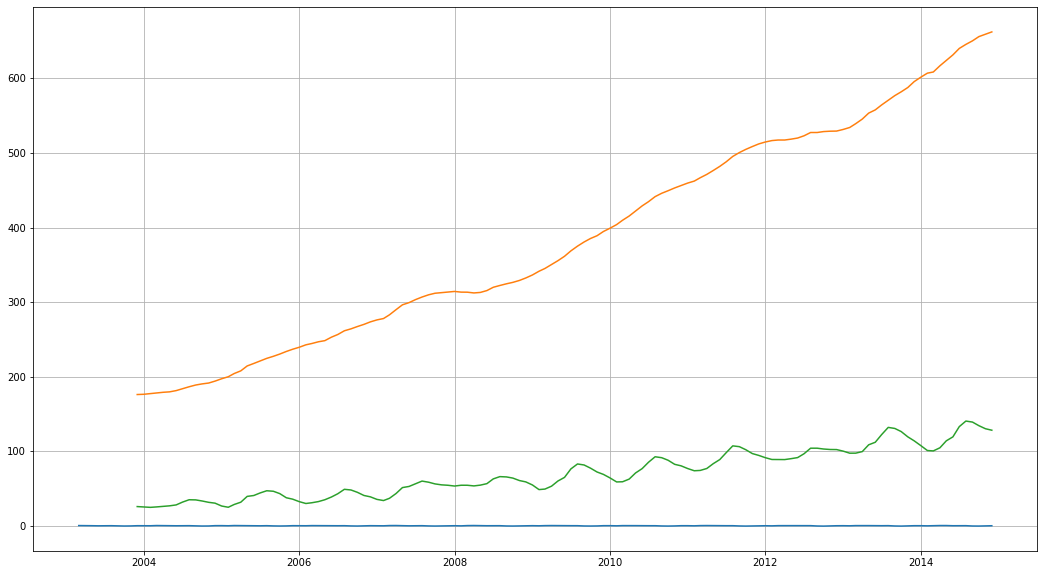

In [68]:
log_diff_data2=np.log(ts_sales).diff(periods=2).dropna()
testStationary(log_diff_data2)

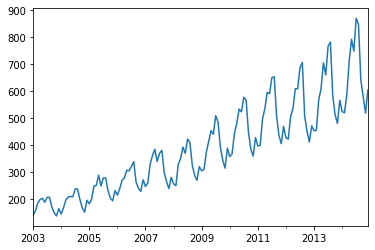

In [61]:
ts_sales.plot()

In [82]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

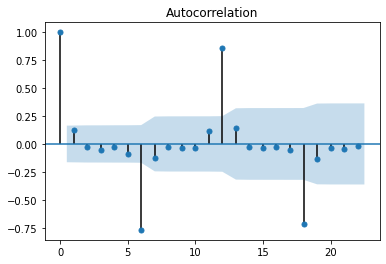

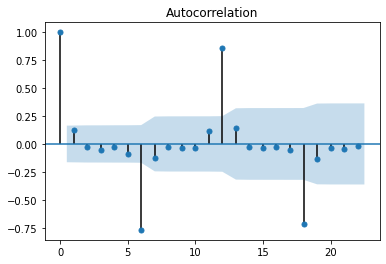

In [63]:
smt.graphics.plot_acf(log_diff_data)

In [64]:
#Lets build the model
#how to build arima 
from statsmodels.tsa.arima_model import ARIMA
# model=ARIMA(DATA,order=())
# model.fit()
# model.forecast
# np.sqrt(mean_squared_error(y,prediction))

In [65]:
# we are iterating till the test data- len(y)def arima_model(X,y, arima_order):
  history= [i for i in X]
  prediction=list()
  for i in range(len(y)):
    model=ARIMA(history,order=arima_order)
    model_fit=model.fit()
    yhat=model_fit.forecast()[0]
    prediction.apend(yhat)
    #inside previous data only we are appending the data- rolling
    history.append(y[i])
    mse=np.sqrt(mean_squared_error(y,prediction))
    return mse

    


In [69]:
len(ts_sales)
#12 months
#last two year data as a test data
#24
144-24

120

In [70]:
train_data=log_diff_data2[:120]

In [71]:
test_data=log_diff_data2[120:]

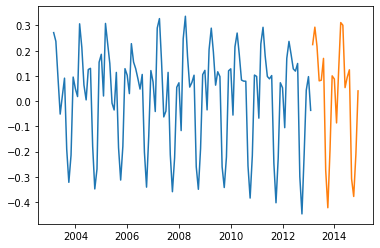

In [72]:
plt.plot(train_data)
plt.plot(test_data)

In [77]:
data=[i for i in train_data]
len(data)

120

In [ ]:
#lets train the model

In [79]:
model=ARIMA(data,order=(1,1,1))


In [83]:
m_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [88]:
#THISis predicting-->121, len of dataset is 120. predicting after 121
m_fit.forecast()[0]

array([-0.02340135])

In [90]:
m_fit.bic

-75.276220760452

In [89]:
#lets check original value and compare
original=log_diff_data2[120]

In [ ]:
model=ARIMA(DATA,order=())
model.fit()
model.forecast
np.sqrt(mean_squared_error(y,prediction))